<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/NLP_SEMACNTIC_PRODUCT_SEARCH/blob/main/eda_semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_merged_products.csv')
print(df.head(4))

   id  query_id  product_id       label        query     query_class  \
0   0         0       25434       Exact  salon chair  Massage Chairs   
1   1         0       12088  Irrelevant  salon chair  Massage Chairs   
2   2         0       42931       Exact  salon chair  Massage Chairs   
3   3         0        2636       Exact  salon chair  Massage Chairs   

                                        product_name  \
0       21.7 '' w waiting room chair with wood frame   
1                  22.5 '' wide polyester side chair   
2      24.4 '' w metal lounge chair with metal frame   
3  25 '' wide faux leather manual swivel standard...   

              product_class  \
0       Waiting Room Chairs   
1             Accent Chairs   
2  Reception Seating Chairs   
3                 Recliners   

                                  category hierarchy  \
0  Commercial Business Furniture / Commercial Off...   
1  Furniture / Living Room Furniture / Chairs & S...   
2  Shop Product Type / Chairs / Gu

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181907 entries, 0 to 181906
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   181907 non-null  int64  
 1   query_id             181907 non-null  int64  
 2   product_id           181907 non-null  int64  
 3   label                181907 non-null  object 
 4   query                181907 non-null  object 
 5   query_class          181907 non-null  object 
 6   product_name         181907 non-null  object 
 7   product_class        181907 non-null  object 
 8   category hierarchy   181907 non-null  object 
 9   product_description  181907 non-null  object 
 10  product_features     181907 non-null  object 
 11  rating_count         145991 non-null  float64
 12  average_rating       145991 non-null  float64
 13  review_count         145991 non-null  float64
 14  product_text         181907 non-null  object 
dtypes: float64(3), in

In [33]:
columns_to_drop = ['id', 'query_id', 'rating_count', 'review_count','average_rating']
df = df.drop(columns=columns_to_drop)

print("\n Null values per column:\n", df.isnull().sum().sum())





 Null values per column:
 0


In [34]:
print("\n Top 10 Query Classes:\n", df['query_class'].value_counts().head(10))
print("\n Top 10 Product Classes:\n", df['product_class'].value_counts().head(10))


 Top 10 Query Classes:
 query_class
Accent Chairs               17977
Beds                        12063
Coffee & Cocktail Tables     9037
Area Rugs                    6902
Dining Chairs                5872
Dressers & Chests            5040
Sofa & Console Tables        4742
End Tables                   4343
Office Chairs                3839
Folding Tables               3568
Name: count, dtype: int64

 Top 10 Product Classes:
 product_class
Coffee & Cocktail Tables    13927
Beds                        10857
Accent Chairs                8092
Dining Chairs                6604
Area Rugs                    5730
Vanities                     5256
End Tables                   4496
Office Chairs                4477
Dining Tables                4307
Bar Stools                   3691
Name: count, dtype: int64



 Label distribution:
 label
Partial       114420
Irrelevant     47595
Exact          19892
Name: count, dtype: int64


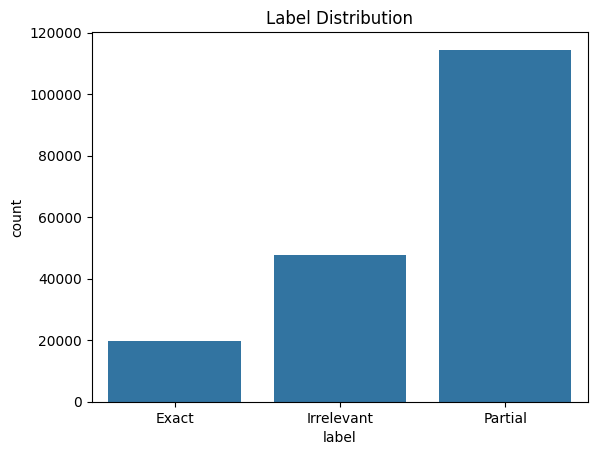


 Query length (in words):
count    181907.000000
mean          3.133959
std           1.550558
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          10.000000
Name: query_length, dtype: float64

 Product text length (in words):
count    181907.000000
mean        224.422513
std          85.949560
min          20.000000
25%         168.000000
50%         213.000000
75%         267.000000
max        2608.000000
Name: product_text_length, dtype: float64


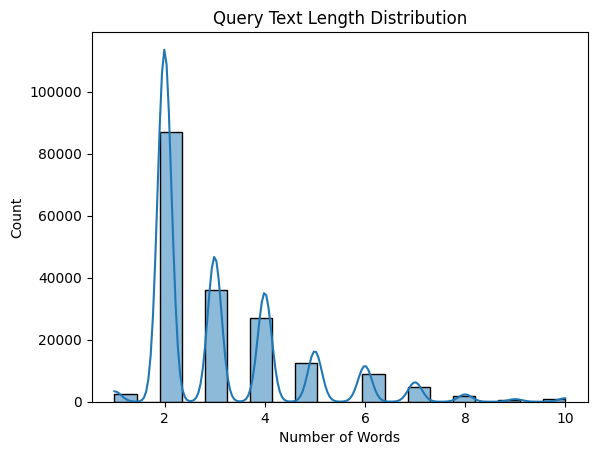

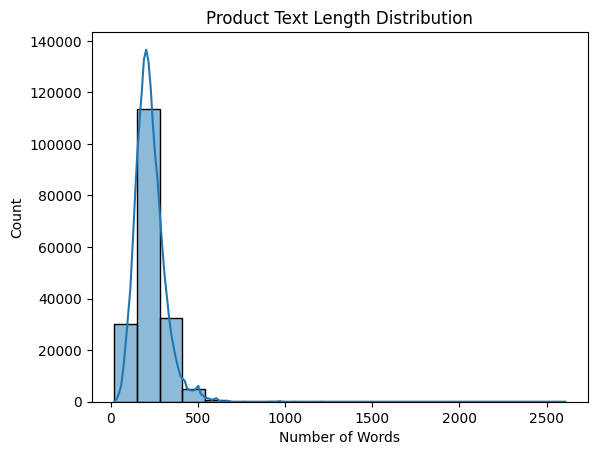

In [35]:
# Label distribution
print("\n Label distribution:\n", df['label'].value_counts())
sns.countplot(data=df, x='label')
plt.title('Label Distribution')
plt.show()

# Check lengths of query and product text
df['query_length'] = df['query'].apply(lambda x: len(str(x).split()))
df['product_text_length'] = df['product_text'].apply(lambda x: len(str(x).split()))

print("\n Query length (in words):")
print(df['query_length'].describe())

print("\n Product text length (in words):")
print(df['product_text_length'].describe())

sns.histplot(df['query_length'], bins=20, kde=True)
plt.title('Query Text Length Distribution')
plt.xlabel('Number of Words')
plt.show()

sns.histplot(df['product_text_length'], bins=20, kde=True)
plt.title('Product Text Length Distribution')
plt.xlabel('Number of Words')
plt.show()

